In [25]:
import pandas as pd
import japanize_matplotlib

In [26]:
df = pd.read_csv('../data/0617_result_question.csv')
#列名クラスを消したい
df = df.drop('クラス', axis=1)

df_math = df[[ '学年', '性別', '2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '2-7', '3-1.数学', '3-2.数',
       '3-3.数', '3-4.数', '3-5.数']]

#MBTI列以外で欠損ちがある行を削除
df_math = df_math.dropna(subset=['学年', '性別', '2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '2-7', '3-1.数学', '3-2.数','3-3.数', '3-4.数', '3-5.数'])


In [27]:
df_math["Y"] = df_math["3-1.数学"].map(lambda x: 1 if x == "土" or x == "未"  else 0)
df_math = df_math.drop("3-1.数学", axis=1)
df_math = df_math.astype(int)

正解率0.7
[[-0.37323508  0.07558949 -0.49587975  0.20577131  0.19982922 -0.60954976
  -0.30072898  1.33276689 -0.75657479  0.28130172 -0.24470131  0.6472145
   0.60668045]]
[-2.76929664]
Index(['学年', '性別', '2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '2-7', '3-2.数',
       '3-3.数', '3-4.数', '3-5.数'],
      dtype='object')


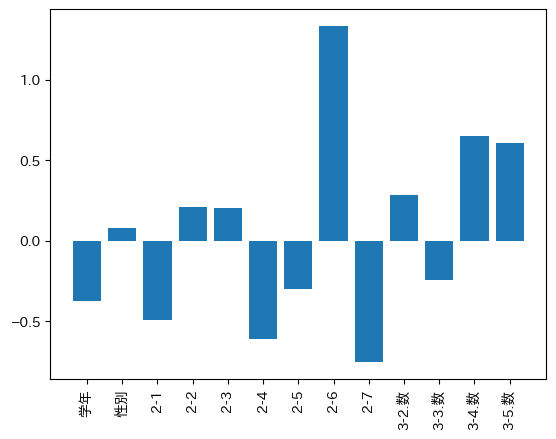

In [28]:
#scikit learnでロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_math.drop("Y", axis=1)
y = df_math["Y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

#正解率
from sklearn.metrics import accuracy_score
print(f"正解率{accuracy_score(y_test, y_pred)}")



#回帰係数
print(lr.coef_)
print(lr.intercept_)
print(X.columns)

#回帰係数のそれぞれの列名に対して棒グラフ
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(X.columns, lr.coef_[0])
plt.xticks(rotation=90)
plt.show()

In [29]:
#回帰係数が有意かどうかを検定
from scipy import stats
import numpy as np

#回帰係数のp値を格納するためのリスト
p_list = []

#回帰係数のp値を検定
for i in range(len(X.columns)):
    p = stats.ttest_ind(X_train.iloc[:,i], y_train)
    p_list.append(p[1])

#p値のリストをnumpy配列に変換
p_list = np.array(p_list)

#p値のリストをデータフレームに変換
p_df = pd.DataFrame(p_list, index=X.columns, columns=["p値"])



In [35]:
#p値が0.05より小さい列名のデータフレームを表示
p_df[p_df["p値"] < 0.01]


,p値
学年,1.829548e-06
2-1,1.683613e-06
2-2,8.234054e-04
2-3,5.003321e-05
2-4,7.634139e-06
2-5,1.386260e-14
2-6,4.300286e-13
2-7,1.946141e-06
3-2.数,2.133150e-08
3-3.数,6.899076e-09
